In [4]:
from osgeo import ogr, gdal, osr
import pandas as pd
import shapely.wkt
import fiona
import json
import os
import base64
import numpy as np
import boto3
from datacube import Datacube
from datacube.utils.geometry import CRS, Geometry, GeoBox
from datacube.testutils.io import native_geobox, native_load
from datacube.utils.dask import start_local_dask
import rioxarray as rioxr
import awswrangler as wr
from datetime import timedelta, datetime
import dask.dataframe as dd

s3_obj =boto3.client('s3')

In [2]:
dc= Datacube()

In [3]:
ls9_polygons = np.genfromtxt("ls9_underfly_ls8.txt", dtype=str)

In [23]:
# ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/test/ls9_wo/ga_ls_wo_3/1-6-0/091/072/2021/11/",
#                                   suffix=[".json"])

# ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/baseline/ga_ls9c_ard_3/"+
#                                   a[0][:3]+"/"+a[0][3:], suffix=[".json"]")
                                  
                                

s/
s/
s/


In [247]:
ls9_datasets

Number of CPUs: 96


In [5]:
# s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev',
#                                  Key=ls9_datasets[1].removeprefix("s3://dea-public-data-dev/"))
# s3_clientdata = s3_clientobj['Body'].read().decode('utf-8')

In [19]:

# re_list = {}
# ls8_matching = []
# ls9_matching = []
# not_matching_lst = []

# for a in ls9_polygons:       
#     ls9_datasets = wr.s3.list_objects("s3://dea-public-data/baseline/ga_ls9c_ard_3/"+
#                                       a[0][:3]+"/"+a[0][3:], suffix=[".json"])                        
#     for d in ls9_datasets:        
#         s3_clientobj = s3_obj.get_object(Bucket='dea-public-data',
#                                      Key=d.removeprefix("s3://dea-public-data/"))
#         s3_clientdata = s3_clientobj['Body'].read().decode('utf-8') 
#         ls9_time = json.loads(s3_clientdata)["properties"]["datetime"]
#         ls9_time = datetime.fromisoformat(ls9_time.rstrip('Z') + "+00:00")   
#         query_poly = Geometry(json.loads(s3_clientdata)["geometry"], crs="4326")
#         ls8_query = {}
#         ls8_query["geopolygon"] = query_poly
#         if ls9_time > datetime.fromisoformat('2021-12-01T23:59:59+00:00'):
#             continue
#         ls9_crs = json.loads(s3_clientdata)["properties"]["proj:epsg"]                    
#         ls8_query['time'] = (ls9_time-timedelta(days=1),
#                          ls9_time+timedelta(days=1))
#         ls8_datasets = dc.find_datasets(product='ga_ls8c_ard_3', **ls8_query)         
#         ls8_datasets.sort(key=lambda x: x.center_time)                            
#         if ls8_datasets == []:
#             continue
#         else:                       
#             non_matching = [ds for ds in ls8_datasets if ds.crs != CRS(str(ls9_crs))]
#             not_matching_lst.extend(non_matching)
           
#             ls8_datasets = [str(ds.id) for ds in ls8_datasets if ds.crs == CRS(str(ls9_crs))]
#             ls8_matching.extend(ls8_datasets)
#             if ls8_datasets:
#                 ls9_matching.append(json.loads(s3_clientdata).get("id"))
#                 print(f"LS9 {json.loads(s3_clientdata).get('id')} matches LS8: {ls8_datasets}")
#         break
                    

In [244]:
# from dea_tools.plotting import display_map, rgb
# rgb_bands = ['red', 'green', 'blue']
# dsp_9 = dc.load(product='ga_ls9c_ard_3', id='4234113f-5883-4d87-9865-b9816a3c3983', measurements=rgb_bands)
# rgb(dsp_9, bands=rgb_bands, index=0)

In [245]:
# dsp_8 = dc.load(product='ga_ls8c_ard_3', id='8327fd6d-16f7-4db9-977f-98de5795e142', measurements=rgb_bands)
# rgb(dsp_8, bands=rgb_bands, index=0)

In [34]:
import glob
import os
import json
import yaml

processed_filese= []
d_path = "/gdata1/projects/landcover/fractional-cover-model/ls9_cf/ga_ls_fc_3/2-5-1/"
           
matching_files = glob.glob(os.path.join(d_path, '**', '*.odc-metadata.yaml'), recursive=True)
for metadata_file in matching_files:
    with open(metadata_file, 'r') as f:
        doc = yaml.safe_load(f)
        processed_files.append(doc['lineage']['ard'][0])

In [7]:
with open("/home/jovyan/dea-notebooks/Scientific_workflows/LS9_FC/ls9_nov_scenes_ids_all.txt", 'r') as f:
    full_list = f.readlines()
    
all_ids =[]
for item in full_list:        
    all_ids.append(item.rstrip('\n'))

In [9]:
set(processed_files) - set(all_ids) 

set()

In [27]:
ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/test/ls9_wo/ga_ls_wo_3/1-6-0/", suffix=[".json"])                                       

NameError: name 'wr' is not defined

In [9]:
ls9_ard_scenes = list(filter(lambda x: '2021-11' in x, ls9_datasets))

In [ ]:
len(ls9_ard_scenes)

In [12]:
from pathlib import Path

wofs_files = []

for f in ls9_ard_scenes:    
    wofs_files.append(Path(f).name.replace('wo', 'fc'))

In [13]:
# path = '/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/ls9_2021_peocessed.txt'

# ls9_fc_2021_processed = []
# with open(path, "r") as file:
#     # Read the file content into a list
#     ids = file.readlines()
    
# for item in ids:        
    # ls9_fc_2021_processed.append(Path(item.rstrip('\n')).name)

In [14]:
len(ls9_fc_2021_processed)

164

In [15]:
set(wofs_files) - set(ls9_fc_2021_processed) 

set()

In [16]:
ls9_nov_scene_ids = []

for d in ls9_ard_scenes:
    s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev', Key=d.removeprefix("s3://dea-public-data-dev/"))
    ls9_scene_id = json.loads(s3_clientobj['Body'].read().decode('utf-8'))['properties']['odc:lineage']['ard']
    ls9_nov_scene_ids.append(ls9_scene_id)    

In [17]:
with open('ls9_nov_scenes_ids_all.txt', "w") as file:
    # Write each item to the file followed by a newline character
    for item in ls9_nov_scene_ids:        
        file.write(item[0] + "\n")

In [2]:
def decode_credentials(encoded_file):
    with open(encoded_file, 'rb') as f:
        encoded_data = f.read()
        decoded_data = base64.b64decode(encoded_data)
        decoded_credentials = decoded_data.decode('utf-8').split(':')        
        # Assuming format of the file is:
        # access_key_id
        # secret_access_key
        access_key_id = decoded_credentials[0]
        secret_access_key = decoded_credentials[1]
      
        return access_key_id, secret_access_key

## Upload data to S3

In [6]:
# def upload_to_s3(local_path, bucket_name, s3_prefix='', extensions=['.tif', '.jpg','.yaml', '.sha1', '.json']):
#     access_key_id, secret_access_key = decode_credentials('/home/jovyan/aws.txt')
#     # Use the decoded credentials to configure boto3
#     s3 = boto3.client(
#         's3',
#         aws_access_key_id=access_key_id,
#         aws_secret_access_key=secret_access_key
#     )

#     for root, dirs, files in os.walk(local_path):   
#         for file in files:      
#             if Path(file).suffix in extensions and root.find('pynb_checkpoints') == -1:
#                 local_file_path = os.path.join(root, file)                            
#                 s3_file_key = os.path.join(s3_prefix, local_file_path.replace("/gdata1/projects/landcover/fractional-cover-model/", ""))                
#                 s3.upload_file(local_file_path, bucket_name, s3_file_key)
#                 print(f"Uploaded {local_file_path} to s3://{bucket_name}/{s3_file_key}")
                            
# # Example usage
# local_path = '/gdata1/projects/landcover/fractional-cover-model/ga_ls_fc_3/2-5-0/'
# bucket_name = 'dea-public-data-dev'
# s3_prefix = 'test/ls9_fc/'

# upload_to_s3(local_path, bucket_name, s3_prefix)

In [1]:
cmds = []

# ids =['3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a', '5c79fea9-c18e-4b5f-b242-e6bc31092d68','ae67d1c9-99a3-488b-ac6a-74ec7389258c']
with open("/home/jovyan/dea-notebooks/Scientific_workflows/LS9_FC/ls9_nov_scenes_ids_all.txt", "r") as file:
    # Read the file content into a list
    ids = file.readlines()
    
for idx in ids:
    idx = idx.rstrip('\n')
    cmds.append(f'datacube-alchemist run-one -u {idx} -c /home/jovyan/ls8_ls9_fc_config.yaml')


In [2]:
cmds

['datacube-alchemist run-one -u 3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a -c /home/jovyan/ls8_ls9_fc_config.yaml',
 'datacube-alchemist run-one -u 5c79fea9-c18e-4b5f-b242-e6bc31092d68 -c /home/jovyan/ls8_ls9_fc_config.yaml',
 'datacube-alchemist run-one -u ae67d1c9-99a3-488b-ac6a-74ec7389258c -c /home/jovyan/ls8_ls9_fc_config.yaml']

In [9]:
len(cmds)

164

In [5]:
# len(ls9_nov_scene_ids)

In [3]:
import multiprocessing
import subprocess

def run_command(command):
    """Function to run a bash command."""
    subprocess.run(command, shell=True)
    # print(command)
    # print("")
    
# Create a list of commands (you can add more commands if needed)
num_cpus = multiprocessing.cpu_count()
print(num_cpus)

# Create a multiprocessing pool with the number of CPUs
with multiprocessing.Pool(processes=1) as pool:
    # Execute the commands using the pool
    results = pool.map_async(run_command, cmds)

    # Wait for all tasks to finish
    results.wait()

    # Check if all tasks have been completed
    if results.ready():
        print("All tasks have been completed.")

96
2024-04-16 10:57:30 [info     ] Task commencing                task=AlchemistTask(dataset=Dataset <id=3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a product=ga_ls9c_ard_3 location=s3://dea-public-data/baseline/ga_ls9c_ard_3/091/083/2021/11/21/ga_ls9c_ard_3-2-1_091083_2021-11-21_final.stac-item.json>, settings=AlchemistSettings(specification=Specification(measurements=['nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2'], transform='fc.virtualproduct.FractionalCover', transform_url='https://github.com/GeoscienceAustralia/fc/', product=None, products=['ga_ls8c_ard_3', 'ga_ls9c_ard_3'], measurement_renames={'nbart_green': 'green', 'nbart_red': 'red', 'nbart_nir': 'nir', 'nbart_swir_1': 'swir1', 'nbart_swir_2': 'swir2'}, transform_args=None, transform_args_per_product={'ga_ls8c_ard_3': {'regression_coefficients': {'blue': [4.1, 0.9747], 'green': [28.9, 0.99779], 'red': [27.4, 1.00446], 'nir': [0.4, 0.98906], 'swir1': [25.6, 0.99467], 'swir2': [-32.7, 1.02551]}, 'output_regress

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-04-16 11:00:27 [info     ] Loaded and transformed         task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')
2024-04-16 11:00:27 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_091083_2021-11-21_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-04-16 11:00:36 [info     ] Finished writing measurements  task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')
2024-04-16 11:00:52 [info     ] Wrote thumbnail                task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')
2024-04-16 11:00:52 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpse1umuzo/ga_ls_fc_3/2-5-1/091/083/2021/11/21/ga_ls_fc_3_091083_2021-11-21_final.odc-metadata.yaml') task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')
2024-04-16 11:00:52 [info     ] STAC file written              task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')
2024-04-16 11:00:52 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ls9_cf/ga_ls_fc_3/2-5-1/091/083/2021/11/21') task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')
2024-04-16 11:00:53 [info     ] Task complete                  task=UUID('3f0b06bf-6d27-4ada-9b7c-09c6a0b85d9a')
2024-04-16 11:00:56 [info     ] Task commencing                task=Alchem

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-04-16 11:03:46 [info     ] Loaded and transformed         task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-04-16 11:03:46 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_094073_2021-11-20_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-04-16 11:03:56 [info     ] Finished writing measurements  task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-04-16 11:04:08 [info     ] Wrote thumbnail                task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-04-16 11:04:08 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmpvfvpifnh/ga_ls_fc_3/2-5-1/094/073/2021/11/20/ga_ls_fc_3_094073_2021-11-20_final.odc-metadata.yaml') task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-04-16 11:04:08 [info     ] STAC file written              task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-04-16 11:04:08 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ls9_cf/ga_ls_fc_3/2-5-1/094/073/2021/11/20') task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-04-16 11:04:09 [info     ] Task complete                  task=UUID('5c79fea9-c18e-4b5f-b242-e6bc31092d68')
2024-04-16 11:04:11 [info     ] Task commencing                task=Alchem

/env/lib/python3.10/site-packages/fc/fractional_cover.py:218: RuntimeWarning: invalid value encountered in cast
  output_data = numpy.array([green, dead, bare, err], dtype=numpy.int8)


2024-04-16 11:07:17 [info     ] Loaded and transformed         task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-04-16 11:07:17 [info     ] Found dtype=int8 in output data, converting to uint8 for geotiffs task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')


/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'title'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27title%27&labels=known-properties&body=Hello%21+The+property+%27title%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.%0A%0AAn+example+value+of+this+property+is%3A+%27ga_ls9c_ard_3-2-1_112080_2021-11-03_final%27%0A%0AThank+you%21%0A
  warnings.warn(
/env/lib/python3.10/site-packages/eodatasets3/properties.py:411: UserWarning: Unknown Stac property 'created'. If this is valid property, please tell us on Github here so we can add it: 
	https://github.com/GeoscienceAustralia/eo-datasets/issues/new?title=Include+property+%27created%27&labels=known-properties&body=Hello%21+The+property+%27created%27+does+not+appear+to+be+in+the+KNOWN_PROPERTIES+list%2C%0Abut+I+believe+it+to+be+valid.

2024-04-16 11:07:27 [info     ] Finished writing measurements  task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')


/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)
/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)
/env/lib/python3.10/site-packages/eodatasets3/images.py:1320: RuntimeWarning: overflow encountered in scalar subtract
  image /= float(imax - imin)


2024-04-16 11:07:40 [info     ] Wrote thumbnail                task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-04-16 11:07:40 [info     ] Assembled dataset              metadata_path=PosixPath('/tmp/tmp4ct80bbk/ga_ls_fc_3/2-5-1/112/080/2021/11/03/ga_ls_fc_3_112080_2021-11-03_final.odc-metadata.yaml') task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-04-16 11:07:40 [info     ] STAC file written              task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-04-16 11:07:40 [info     ] Writing files to disk          location=PosixPath('/gdata1/projects/landcover/fractional-cover-model/ls9_cf/ga_ls_fc_3/2-5-1/112/080/2021/11/03') task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
2024-04-16 11:07:41 [info     ] Task complete                  task=UUID('ae67d1c9-99a3-488b-ac6a-74ec7389258c')
All tasks have been completed.


In [6]:
def native_load_dss(dss, base_ds, measurements=None):
    geobox = native_geobox(
            base_ds, basis=list(dss[0].measurements.keys())[0]
        )
    mm = dss[0].type.lookup_measurements(measurements)
    tmp_data = dc.load_data(dc.group_datasets(dss, 'time'),
                    geobox, measurements=mm, dask_chunks={'time': 1, 'x': -1, 'y': -1})
        
    return tmp_data

In [158]:
sea_pathrows = '113072', '113074', '113083', '091072', '091075', '094071', '094072'
ls9_polygons_no_sea = [] 

for ply in ls9_polygons:
    if not ply[0] in sea_pathrows:        
        ls9_polygons_no_sea.append(ply)
    else:
        print(" dropping", ply[0])

 dropping 113072
 dropping 113074
 dropping 113083
 dropping 091072
 dropping 091075
 dropping 094071
 dropping 094072


(60, 67)

In [183]:
prc_10 = []
prc_50 = []
prc_90 = []
diffs = []

# a = ['091077']
for a in ls9_polygons_no_sea:   
    print(a)
    ls9_datasets = wr.s3.list_objects("s3://dea-public-data-dev/test/ls9_fc/ga_ls_fc_3/2-5-0/"+
                                      a[0][:3]+"/"+a[0][3:], suffix=[".json"])
    for d in ls9_datasets:       
        s3_clientobj = s3_obj.get_object(Bucket='dea-public-data-dev',
                                     Key=d.removeprefix("s3://dea-public-data-dev/"))
        s3_clientdata = s3_clientobj['Body'].read().decode('utf-8')
        
        for band in ['pv']:
            load_path = json.loads(s3_clientdata)["assets"][band]['href']
            ls9_time = json.loads(s3_clientdata)["properties"]["datetime"]
            ls9_time = datetime.fromisoformat(ls9_time.rstrip('Z') + "+00:00")
            query_poly = Geometry(json.loads(s3_clientdata)["geometry"], crs="4326")
            ls8_query = {}
            ls8_query["geopolygon"] = query_poly
            if ls9_time > datetime.fromisoformat('2021-12-01T23:59:59+00:00'):
                continue
            ls9_crs = json.loads(s3_clientdata)["properties"]["proj:epsg"]
            ls8_query['time'] = (ls9_time-timedelta(days=1),
                             ls9_time+timedelta(days=1))
            ls8_datasets = dc.find_datasets(product='ga_ls_fc_3', platform="landsat-8", **ls8_query)
            
            ls8_ard_datasets = dc.find_datasets(product='ga_ls8c_ard_3', **ls8_query)                        
   
            
            ls8_datasets_masked.sort(key=lambda x: x.center_time)            
            if ls8_datasets == []:                    
                continue
            else:         
                ls9_data = rioxr.open_rasterio(load_path, chunks={'x':-1, 'y':-1})
                non_matching = [ds for ds in ls8_datasets if ds.crs != CRS(str(ls9_crs))]         
                ls8_datasets = [ds for ds in ls8_datasets if ds.crs == CRS(str(ls9_crs))]  
                for ds, ds_ard in zip(ls8_datasets, ls8_ard_datasets):
                    
                    ls8_data = native_load_dss([ds], ds, measurements=[band])
                    
                    ls8_ard_data = native_load_dss([ds_ard], ds_ard, measurements=['fmask'])
                    ls8_data = ls8_data.where(ls8_ard_data['fmask']==1)
                    
                    if (len(ls8_data[band]) > 0):
                        intersect_region = (ls8_data[band][0].where(ls8_data[band] != 255)  - ls9_data[0].where(ls9_data[0] != 255))[0]                    
                        diff = ls9_data[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1) - ls8_data.pv[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1)                #                  
                        diff_data = diff.compute()
                        diffs.extend(diff_data)                                        
                        prc_10.append(np.percentile(diff_data, 10))
                        prc_50.append(np.percentile(diff_data, 50))
                        prc_90.append(np.percentile(diff_data, 90))                 

['113073' '117.218' '-19.674' '119.3' '-17.9043']
['113075' '116.527' '-22.56' '118.65' '-20.7871']
['113076' '116.174' '-24.0021' '118.319' '-22.2273']
['113077' '115.814' '-25.4435' '117.985' '-23.6668']
['113078' '115.448' '-26.8842' '117.645' '-25.1053']
['113079' '115.074' '-28.3242' '117.3' '-26.543']
['113080' '114.692' '-29.7633' '116.95' '-27.9796']
['113081' '114.302' '-31.2017' '116.594' '-29.4152']
['113082' '113.902' '-32.6391' '116.231' '-30.8496']
['091073' '151.209' '-19.674' '153.291' '-17.9043']
['091074' '150.867' '-21.1173' '152.968' '-19.3461']
['091076' '150.165' '-24.0021' '152.311' '-22.2273']
['091077' '149.805' '-25.4435' '151.976' '-23.6668']
['091078' '149.439' '-26.8842' '151.637' '-25.1053']
['091079' '149.065' '-28.3242' '151.292' '-26.543']
['091080' '148.684' '-29.7633' '150.942' '-27.9796']
['091081' '148.293' '-31.2017' '150.585' '-29.4152']
['091082' '147.893' '-32.6391' '150.222' '-30.8496']
['091083' '147.484' '-34.0755' '149.851' '-32.2829']
['091

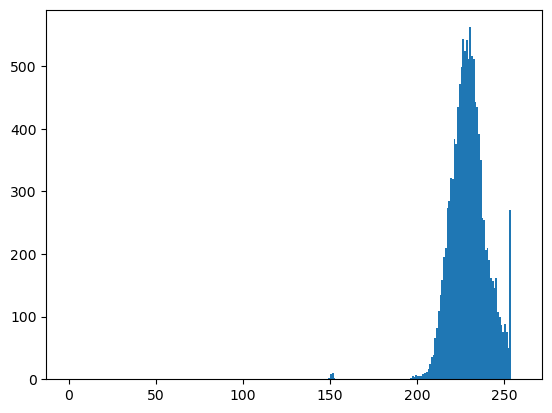

In [184]:
ls9_num, bins, _ = plt.hist(diffs, bins=np.arange(0, 260))

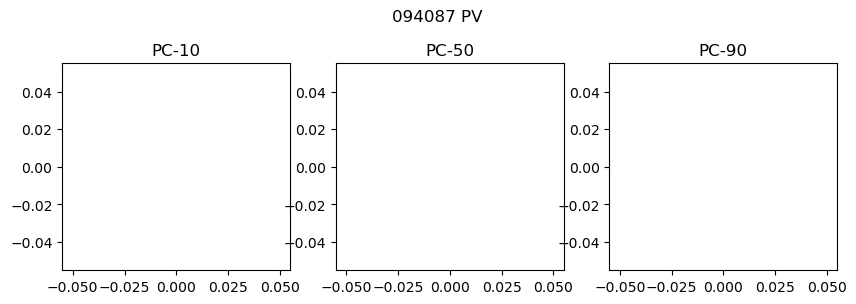

In [186]:
import matplotlib.pyplot as plt 

plot_percentile(band, 1, prc_10, prc_50, prc_90)

In [145]:
np.array(prc_50)[np.array(prc_50) > 200]

array([251., 250., 237., 240., 244., 243., 246., 240., 224., 207., 218.,
       225., 229., 229., 226., 225., 228., 242., 227., 224., 226., 232.,
       245., 238., 238., 240.])

In [39]:
def plot_percentile(band, n, prc_10, prc_50, prc_90):
    plt.figure(figsize=(10, 3))

    x_values = np.arange(len(prc_10))
    plt.subplot(n, 3, 1)
    plt.plot(x_values, prc_10, 'ro', label=f'PC-10 {band}')
    plt.title('PC-10')

    x_values = np.arange(len(prc_50))
    plt.subplot(n, 3, 2)
    plt.plot(x_values, prc_50, 'go', label=f'PC-50 {band}')
    plt.title('PC-50')

    x_values = np.arange(len(prc_90))
    plt.subplot(n, 3, 3)
    plt.plot(x_values, prc_90, 'bo', label=f'PC-90 {band}')    
    plt.title('PC-90')    
    plt.subplots_adjust(top=0.8)
    
    plt.suptitle(f'{a[0]} PV')
    # plt.savefig(f'{a[0]}_PV.png')

    plt.show()
    

In [141]:
# intersect_region.shape, ls9_data.shape, ls9_data.shape

In [142]:
# ls8_data.pv[0].plot.imshow()

In [143]:
# ls9_data[0].plot.imshow()

(119,)

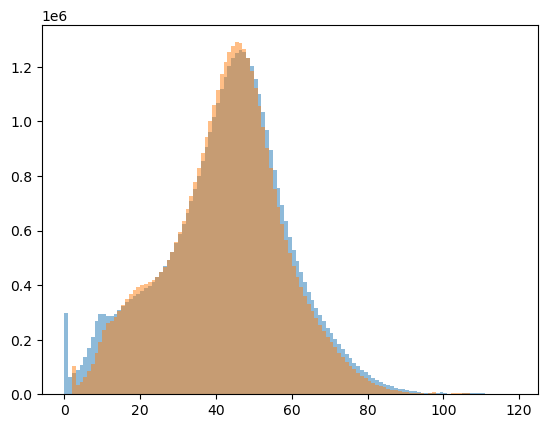

In [125]:
import matplotlib.pyplot as plt

ls9_num, bins, _ = plt.hist(ls9_data[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1),
         bins=np.arange(0, 120),  alpha=0.5)
ls8_num, _, _ = plt.hist(ls8_data.pv[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1),
         bins=np.arange(0, 120), alpha=0.5)

(ls9_num - ls8_num).shape

In [132]:
diff = ls9_data[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1) - ls8_data.pv[0].sel(x=intersect_region.x, y=intersect_region.y).data.reshape(-1)

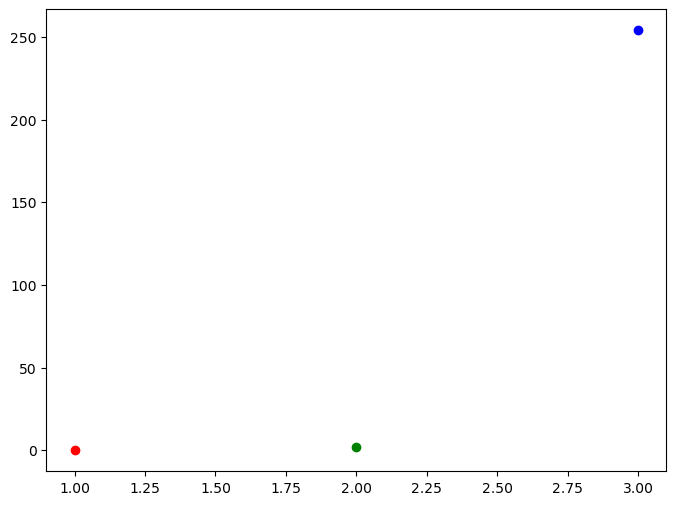